# Home App 
## Part III- Create processed data for part IV

The data for this project comes from Kaggle  [House Sales in King County, USA](https://www.kaggle.com/architdxb/king-countyusa/data). The list of variables is shown below.

The variables:

* **id** : house identification number
* **date** : date house was sold
* **price** : target variable for prediction
* **bedrooms** : number of bedrooms in the home
* **bathrooms** : number of bathrooms in the home
* **sqft_living** : square footage of the home
* **sqft_lot** : square footage of the lot
* **floors** : total floors in the home
* **waterfront** : 1 for home with a waterfront view, 0 otherwise
* **view** : has been viewed or not
* **condition** : How good the condition is overall
* **grade** : overall grade given to the housing unit, based on king county grading system
* **sqft_above** : square footage of home apart from basement
* **sqft_basement** : square footage of the basement
* **yr_built** : year the home was built
* **yr_renovated** : year the home was renovated
* **zipcode** : zip code of the home
* **lat** : latitude coordinate of the home
* **long** : longitude coordinate of the home
* **sqft_living15** : living room area in 2015
* **sqft_lot15** : lot area in 2015

For this part of the project, we will only use id, price, bedrooms, bathrooms, sqft_living, sqft_lot, yr_built and yr_renovated for our model. 

For part III of the project, we will: 

1. Read the documentation and familiarize yourself with the dataset. 
2. Combine all of the data files into one large dataset. 
3. Create the processed_data dataset for analysis. 
 


### I. Load and Merge Data

In [136]:
# load necessary packages 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
import glob
import itertools
import seaborn as sns
from scipy import stats
from time import time

# pretty display for notebooks
%matplotlib inline

from IPython.display import display # Allows the use of display() for DataFrames

# hide warnings
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, HTML
pd.set_option('display.max_colwidth', -1)

data_path = "C:/Users/Yiruru/Documents/launchCode/data/kc_house_data2.csv"

# Load and merge the housing data
try:
    df = pd.read_csv(data_path)
    print("Main dataset has {} samples with {} features each.".format(*df.shape))
except:
    print("Dataset could not be loaded. Is the dataset missing?")

Main dataset has 21613 samples with 21 features each.


The properties_2017.csv file contains details on the properties, and the train_2017.csv provides the actual log error for training purpose. Therefore, the goal here is to predict the log error using the properties of the houses. There are 58 properties, so we should perform some dimension reduction first. 

However, for the purpose of initial test, a smaller model will be built using only bedroomcnt, bathroomcnt, and calculatedfinishedsquarefeet.

### II. Data Exploration 

In [137]:
# reset index to id
df = df.set_index('id')
print ('Table 1: Sample Data from main dataset')
df.head(3)

Table 1: Sample Data from main dataset


date     price  bedrooms  bathrooms  sqft_living  \
id                                                                        
7129300520  20141013T000000  221900.0  3         1.00       1180          
6414100192  20141209T000000  538000.0  3         2.25       2570          
5631500400  20150225T000000  180000.0  2         1.00       770           

            sqft_lot  floors  waterfront  view  condition  grade  sqft_above  \
id                                                                             
7129300520  5650      1.0     0           0     3          7      1180         
6414100192  7242      2.0     0           0     3          7      2170         
5631500400  10000     1.0     0           0     3          6      770          

            sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
id                                                                             
7129300520  0              1955      0             98178    47.5112 -122.257   
6414100192  400            1951      1991          98125    47.7210 -122.319   
5631500400  0              1933      0             98028    47.7379 -122.233   

            sqft_living15  sqft_lot15  
id                                     
7129300520  1340           5650        
6414100192  1690           7639        
5631500400  2720           8062

In [138]:
print('Number of features:', df.shape[1])
train = df.select_dtypes(exclude=['object'])
print("")
print('Number of Numerical Features:', train.shape[1])

print("")
print("List of features contained our dataset:",list(train.columns))
%matplotlib inline

Number of features: 20

Number of Numerical Features: 19

List of features contained our dataset: ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [72]:
# convert zipcode to categorical variable
#df['zipcode'] = df['zipcode'].astype('category')

In [74]:
display(train.describe)

<bound method NDFrame.describe of                id      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0      7129300520  221900.0   3         1.00       1180         5650       
1      6414100192  538000.0   3         2.25       2570         7242       
2      5631500400  180000.0   2         1.00       770          10000      
3      2487200875  604000.0   4         3.00       1960         5000       
4      1954400510  510000.0   3         2.00       1680         8080       
5      7237550310  1230000.0  4         4.50       5420         101930     
6      1321400060  257500.0   3         2.25       1715         6819       
7      2008000270  291850.0   3         1.50       1060         9711       
8      2414600126  229500.0   3         1.00       1780         7470       
9      3793500160  323000.0   3         2.50       1890         6560       
10     1736800520  662500.0   3         2.50       3560         9796       
11     9212900260  468000.0   2         1.00       116

#### Check missing values

We can see below that there's no missing values in our data as the data has been processed before. 

In [139]:
# calculate % of missing value
total = train.isnull().sum().sort_values(ascending=False)
percent = (100*train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print('Table 2. Number of Missing Data for each Feature (Not used in doc)')
missing_data

Table 2. Number of Missing Data for each Feature (Not used in doc)


Total  Percent
sqft_lot15     0      0.0    
condition      0      0.0    
bedrooms       0      0.0    
bathrooms      0      0.0    
sqft_living    0      0.0    
sqft_lot       0      0.0    
floors         0      0.0    
waterfront     0      0.0    
view           0      0.0    
grade          0      0.0    
sqft_living15  0      0.0    
sqft_above     0      0.0    
sqft_basement  0      0.0    
yr_built       0      0.0    
yr_renovated   0      0.0    
zipcode        0      0.0    
lat            0      0.0    
long           0      0.0    
price          0      0.0

### Visualize Feature Distributions

The scatterplot matrix will reveal the correlation between the feature and another feature in the data. 

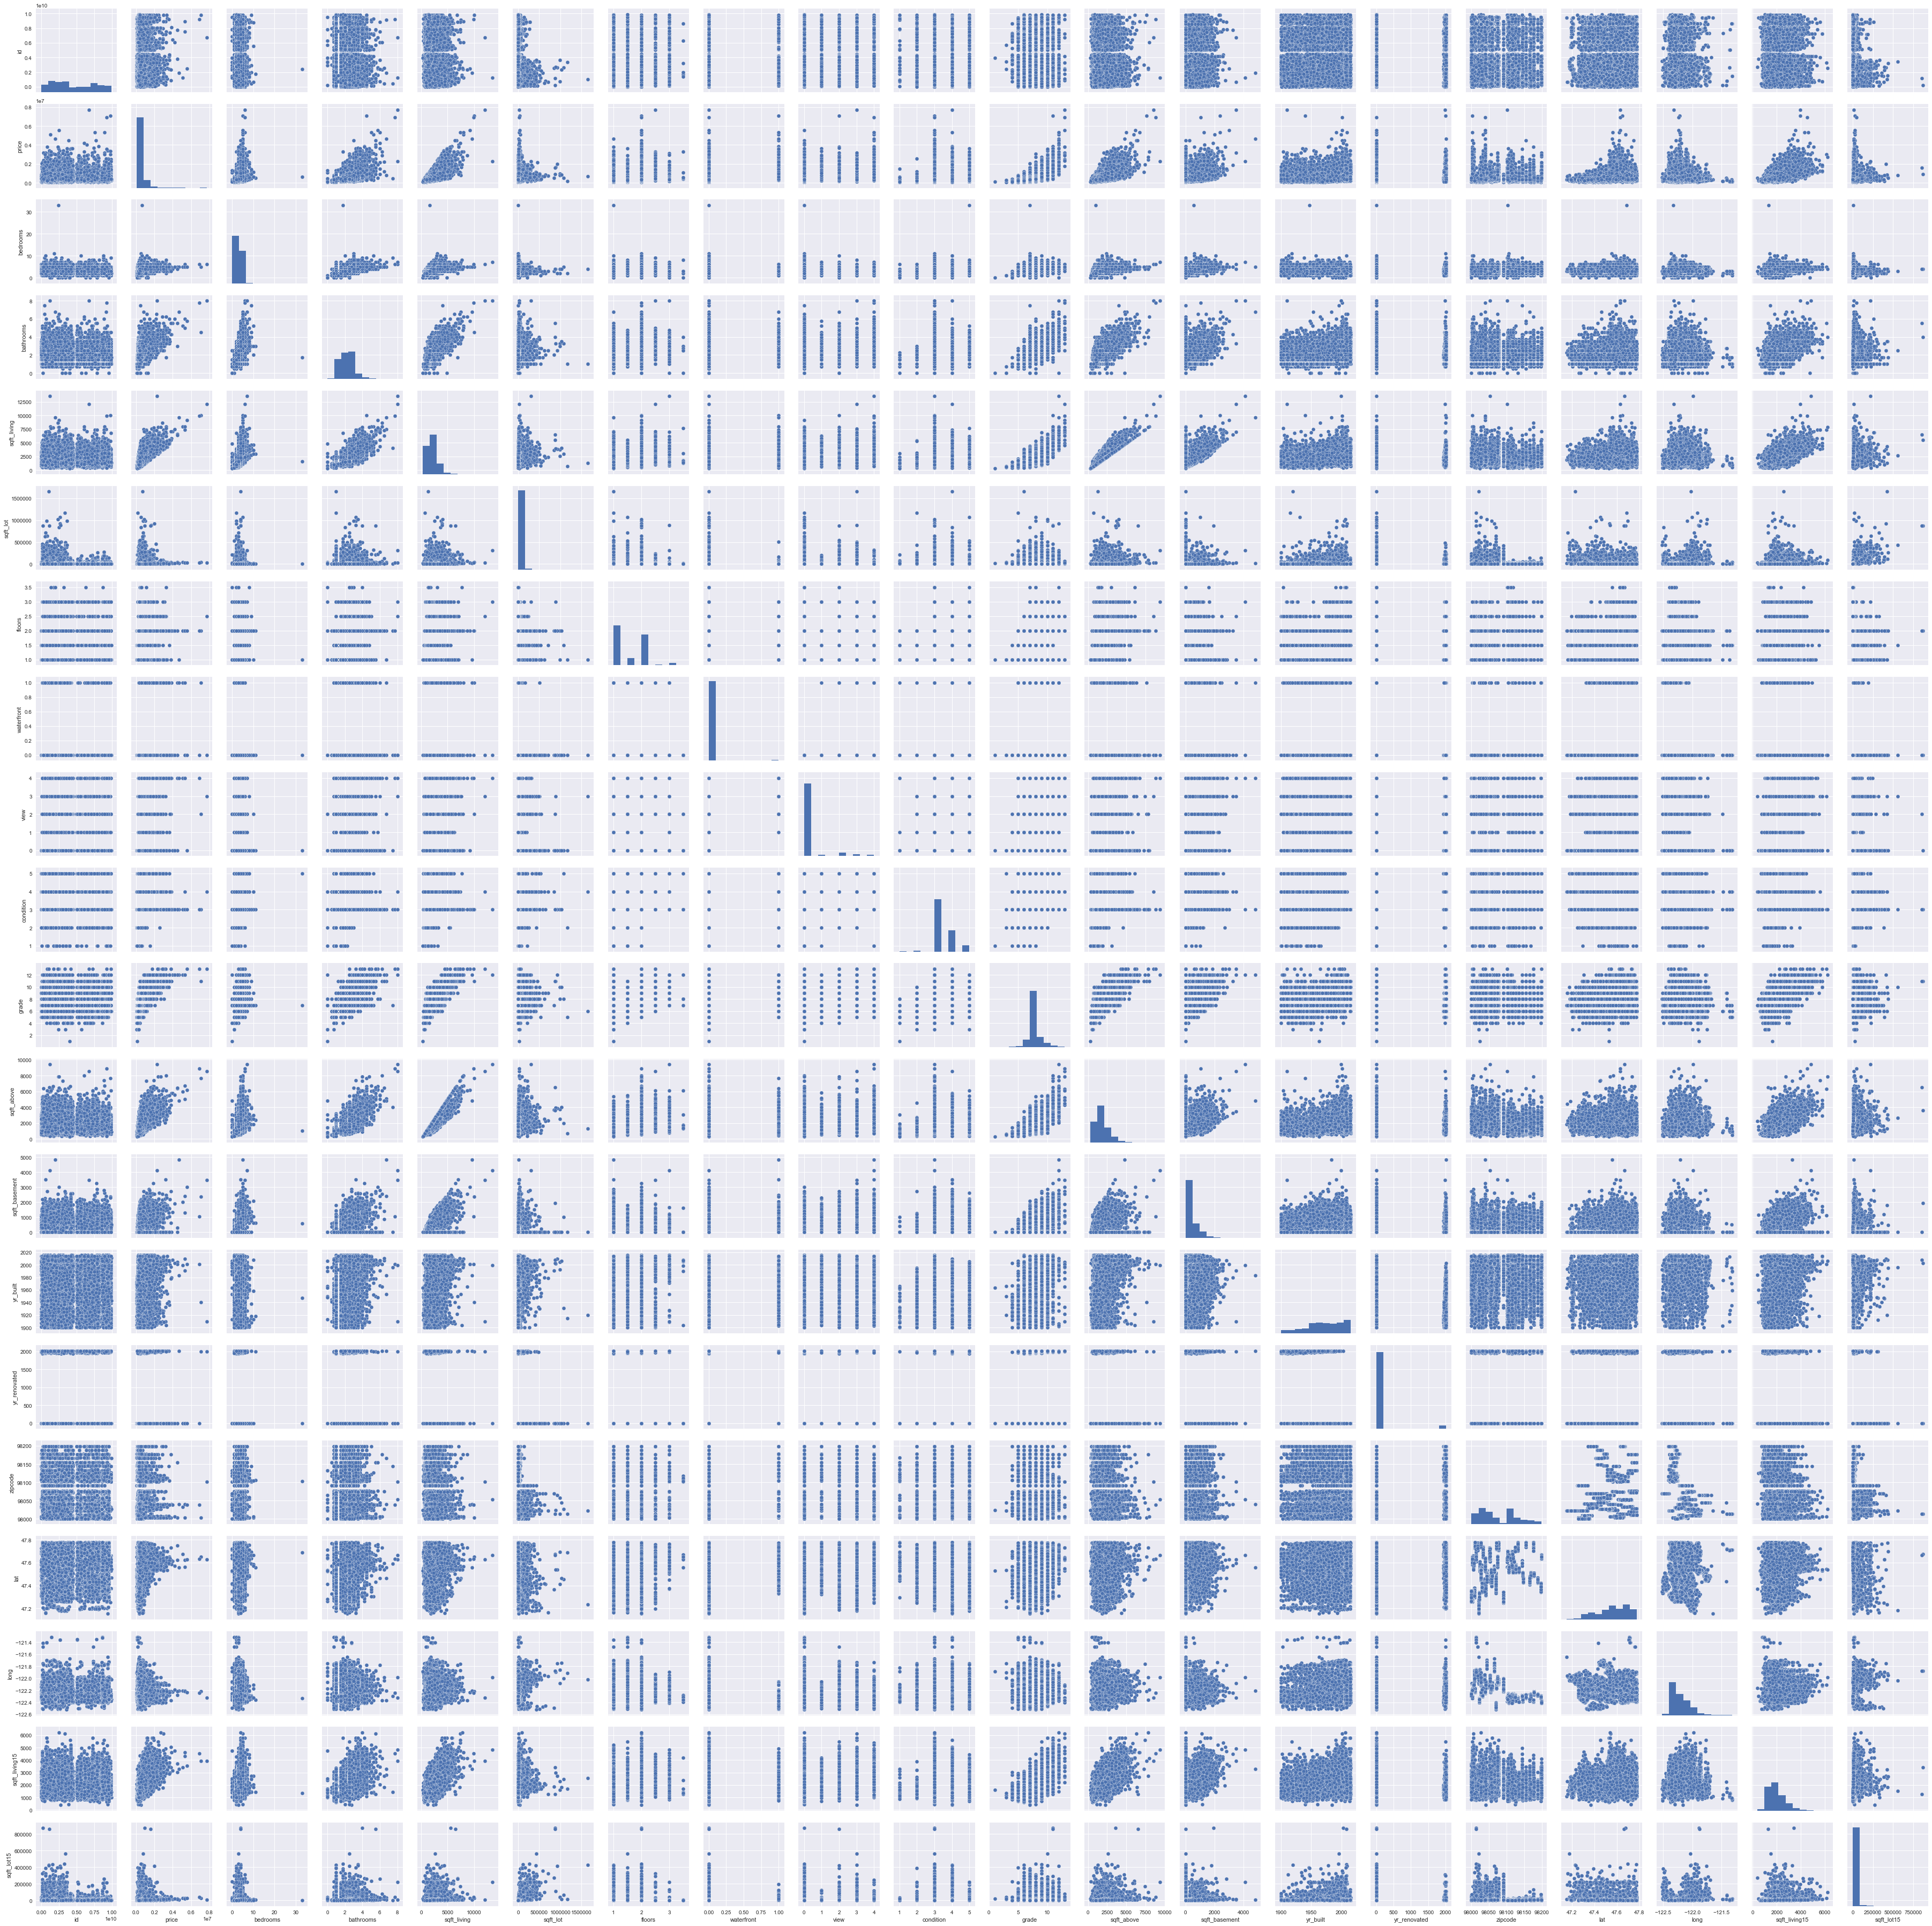

In [76]:
import seaborn as sns
sns.set()
sns.pairplot(train)
plt.show()

We can see that some variables are linearly correlated, so we should examine the correlation between variables before we proceed with modeling. 

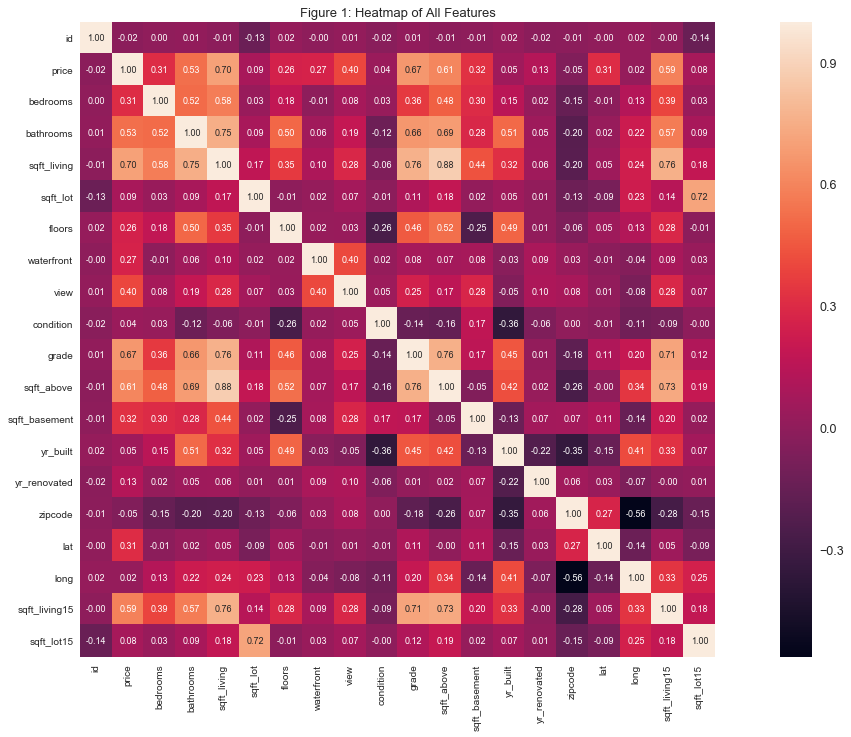

In [77]:
#saleprice correlation matrix
k = 19
cols = train.columns
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('Figure 1: Heatmap of All Features', size = 13)
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()
plt.xticks(rotation=90);

Square_above and square_living are highly correlated (r = 0.88), and that makes sense. Square_above will be removed to avoid multicollinearity. 

We can see that calculatedbathnbr is highly correlated with fullbathcnt (r= 0.98) and bathroomcnt (r= 0.98). On the other hand, taxamount, landtaxvaluedollarcnt, taxvaluedollarcnt are highly correlated too. We will only use fullbathcnt and landtaxvaluedollarcnt as they're less correlated with other features. 

In [142]:
col_list = list()
for i in train.columns: 
    col_list.append(i)
print(col_list)

['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [144]:
#col_list
#new_col_list = col_list[0:4] + col_list[11:14]
new_col_list = col_list[0:5] + col_list[12:15]
current2 = train[new_col_list]
# create a year value that represent the most current time that the house went through any change
current2['year'] = current2[['yr_built', 'yr_renovated']].max(axis=1) 
current2 = current2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'zipcode', 'year']]

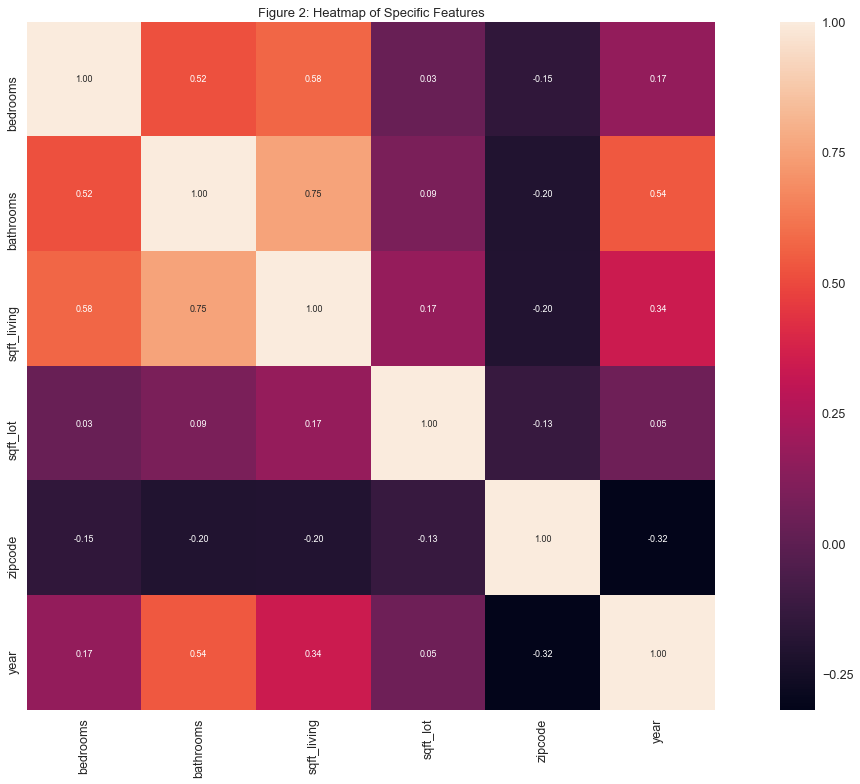

In [146]:
#saleprice correlation matrix
k = 6
cols = current2.columns
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 10.5)
plt.title('Figure 2: Heatmap of Specific Features', size = 13)
cm = np.corrcoef(current2[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 9}, yticklabels=cols.values, xticklabels=cols.values)
plt.tight_layout()
plt.xticks(rotation=90);

In [147]:
current2 = current2.reset_index()
train = train.reset_index()
temp= train[['id', 'price']]
new_data = current2.merge(temp,on= 'id', how = 'inner')
new_data = new_data.set_index('id')

In [148]:
x_var = new_data.columns[:-1]; y_var = new_data.columns[-1]

### Train/Test data Split

Majority of the features have too many missing values, so we will only consider features with less than 10% of missing values. 

In [149]:
new_data.head(2)

bedrooms  bathrooms  sqft_living  sqft_lot  zipcode  year  \
id                                                                      
7129300520  3         1.00       1180         5650      98178    1955   
6414100192  3         2.25       2570         7242      98125    1991   

               price  
id                    
7129300520  221900.0  
6414100192  538000.0

In [150]:
# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler()
numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'year', 'zipcode']
price_raw = new_data['price']
features_raw = new_data.drop('price', axis = 1)
features_raw[numerical] = scaler.fit_transform(new_data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 1))
features = pd.get_dummies(features_raw)
price = new_data['price']

bedrooms  bathrooms  sqft_living  sqft_lot   zipcode      year
id                                                                        
7129300520  0.090909  0.125      0.06717      0.003108  0.893939  0.478261

In [168]:
new_data.to_csv('processed_data.csv', sep=',')